In [186]:
import pandas as pd
import plotly.express as px


df = pd.read_excel("../../files/long_format_cleaned_data.xlsx")
print(df.head())



                            Indicator  Year    Value
0  Antal antagna som påbörjat studier  2007  14652.0
1       därav andel kvinnor i procent  2007     55.0
2           därav andel män i procent  2007     45.0
3                    Antal studerande  2007  33684.0
4       därav andel kvinnor i procent  2007     55.0


c:\STI\github\projekt_skool\yh_project_the_skool_group4\.venv\Lib\site-packages\gevent\hub.py:161: UserWarning:

libuv only supports millisecond timer resolution; all times less will be set to 1 ms



In [187]:
df.query("Indicator == 'Antal studerande'")

,Indicator,Year,Value
3,Antal studerande,2007,33684.0
15,Antal studerande,2008,36657.0
27,Antal studerande,2009,39417.0
39,Antal studerande,2010,41597.0
51,Antal studerande,2011,42484.0
63,Antal studerande,2012,40754.0
75,Antal studerande,2013,42596.0
87,Antal studerande,2014,44929.0
99,Antal studerande,2015,46633.0
111,Antal studerande,2016,47983.0


c:\STI\github\projekt_skool\yh_project_the_skool_group4\.venv\Lib\site-packages\gevent\hub.py:161: UserWarning:

libuv only supports millisecond timer resolution; all times less will be set to 1 ms



In [188]:
def filter_df_indicator(df, indicator="Antal studerande"):
    return df.query("Indicator == @indicator").reset_index()

df_antal_studerande = filter_df_indicator(df) 
df_antal_studerande

,index,Indicator,Year,Value
0,3,Antal studerande,2007,33684.0
1,15,Antal studerande,2008,36657.0
2,27,Antal studerande,2009,39417.0
3,39,Antal studerande,2010,41597.0
4,51,Antal studerande,2011,42484.0
5,63,Antal studerande,2012,40754.0
6,75,Antal studerande,2013,42596.0
7,87,Antal studerande,2014,44929.0
8,99,Antal studerande,2015,46633.0
9,111,Antal studerande,2016,47983.0


c:\STI\github\projekt_skool\yh_project_the_skool_group4\.venv\Lib\site-packages\gevent\hub.py:161: UserWarning:

libuv only supports millisecond timer resolution; all times less will be set to 1 ms



In [189]:


def create_indicator_bar(df, **options):
    fig = px.bar(df, y="Year", x="Value", orientation="h", color_discrete_sequence=["#A0C0BD"], text="Value",)
    fig.update_layout(
        title="Antal studerande per år(2007_2024)",
        
        yaxis=dict(linecolor="lightgray", linewidth=3, showline=True, title=dict(text=f"<b>{options.get('xlabel')}</b>")),
        xaxis=dict(
            title = dict(text=f"<b>{options.get('ylabel')}</b>"), linewidth=3, linecolor="lightgray", showline=True),
        height=600,
        width=800, 
        plot_bgcolor="rgba(0,0,0,0)" 
    
    )
    fig.add_annotation(
        text="Källa: Statistiska centralbyrån (SCB)",
        xref="paper",
        yref="paper",
        x=0.5,
        y=-0.14,
        showarrow=False,
        font=dict(size=10, color="gray"),
        align="center",
       
    )

    fig.update_traces(
        texttemplate="%{x}",
        textposition="outside",
        marker=dict(line=dict(color="white", width=1)),
        hovertemplate="<b>%{x}</b> studerande<br>%{y}",
        textfont_size=10
    )
    return fig
create_indicator_bar(df_antal_studerande , ylabel="Antal studerande", xlabel="År").show()

c:\STI\github\projekt_skool\yh_project_the_skool_group4\.venv\Lib\site-packages\gevent\hub.py:161: UserWarning:

libuv only supports millisecond timer resolution; all times less will be set to 1 ms



C:\Users\mogha\AppData\Local\Temp\ipykernel_6440\838539245.py:58: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



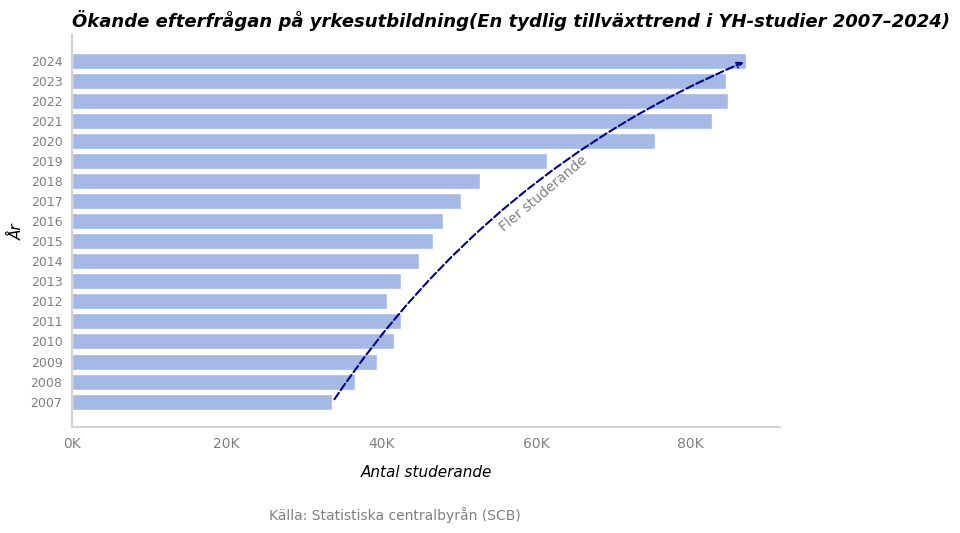

c:\STI\github\projekt_skool\yh_project_the_skool_group4\.venv\Lib\site-packages\gevent\hub.py:161: UserWarning:

libuv only supports millisecond timer resolution; all times less will be set to 1 ms



In [190]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def create_indicator_bar(df, **options):
    fig, ax = plt.subplots(figsize=(8, 5))

    # رسم نمودار میله‌ای افقی
    bars = ax.barh(df["Year"], df["Value"], color="#A5B9E6", edgecolor="white")

    # عنوان و برچسب محور‌ها
    ax.set_title("Ökande efterfrågan på yrkesutbildning(En tydlig tillväxttrend i YH-studier 2007–2024)", fontsize=13,loc="left", fontweight="bold", fontstyle="italic")
    ax.set_xlabel(options.get("ylabel", "Antal studerande"), fontsize=11, fontstyle="italic", labelpad=10)
    ax.set_ylabel(options.get("xlabel", "År"), fontsize=11, fontstyle="italic")
    ax.spines[["top", "right"]].set_visible(False)  # حذف قاب بالا و راست
    ax.spines[["left", "bottom"]].set_linewidth(1.5)
    ax.spines[["left", "bottom"]].set_color("lightgray") # ضخامت قاب چپ


    # اضافه کردن فلش با arrowprops
    ax.annotate("", xy=(df["Value"].iloc[-1], df["Year"].iloc[-1]),      # نقطه مقصد فلش
        xytext=(df["Value"].iloc[0]+50, df["Year"].iloc[0]),
        textcoords='data',    # نقطه شروع فلش
        arrowprops=dict(
            arrowstyle="->",
            color="darkblue",
            lw=1.5,
            connectionstyle="arc3,rad=-0.15",
             linestyle="dashed" # برای انحنای ملایم
        ),
        fontsize=9,
        color="gray",
        ha="left",
        va="center"
    )
        # متن جداگانه کنار فلش
    ax.text(
        x=(df["Value"].iloc[0] + df["Value"].iloc[-1]) / 2.2,  # موقعیت X نسبی
        y=(df["Year"].iloc[0] + df["Year"].iloc[-1]) / 2 - 0.009,         # موقعیت Y نسبی
        s="Fler studerande",
        fontsize=10,
        color="gray",
        rotation=40  # چرخش متن
    )

    # منبع پایین نمودار
    plt.figtext(0.5, -0.05, "Källa: Statistiska centralbyrån (SCB)", ha="center", fontsize=10, color="gray")
    ax.set_yticks(df["Year"])
    ax.set_yticklabels(df["Year"].astype(int))
    ax.tick_params(left=False, bottom=False)
    ax.tick_params(axis='y', labelsize=9, labelcolor="gray")
    ax.tick_params(axis='x', labelsize=10, labelcolor="gray")
    formatter = FuncFormatter(lambda x, pos: f"{int(x/1000)}K")
    ax.xaxis.set_major_formatter(formatter)
    plt.tight_layout()
    return fig

create_indicator_bar(df_antal_studerande , ylabel="Antal studerande", xlabel="År").show()
